<a href="https://colab.research.google.com/github/Priya1598/DeepLearning_Breast_cancer/blob/main/Cats_and_dogs_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
!pip install kaggle

In [54]:
# from google.colab import files
# files.upload()                      ## to upload Json file

In [56]:
#Config the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Dog Vs Cat Dataset from Kaggle

In [57]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [58]:
!kaggle datasets list | head


ref                                                            title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset   Global Earthquake-Tsunami Risk Assessment Dataset       16151  2025-10-01 16:35:53.273000          11408        403  1.0              
jaderz/hospital-beds-management                                Hospital Beds Management                                47583  2025-10-03 09:21:58.590000           9410        234  1.0              
jockeroika/life-style-data                                     Life Style Data                                       3995645  2025-10-14 13:50:45.303000          13408        293  0.8235294        
ahmadrazak

In [59]:
!ls    ## files in json file

dogs-vs-cats.zip  resized_image  sampleSubmission.csv  train
kaggle.json	  sample_data	 test1.zip	       train.zip


In [60]:
## extracting the compressed dataset
from zipfile import ZipFile

In [193]:
dataset='dogs-vs-cats.zip'

In [62]:
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [63]:
train_dataset='/content/train.zip'

with ZipFile(train_dataset,'r')as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [64]:
import os
#counting the number of files in train folder
path,dir,files =next(os.walk('/content/train'))
file_count = len(files)
print('The Number of images: ',file_count)

The Number of images:  25000


Printing the name of the image

In [65]:
file_names=os.listdir('/content/train')
print(file_names)

['dog.8435.jpg', 'dog.4308.jpg', 'cat.9949.jpg', 'dog.12374.jpg', 'dog.1670.jpg', 'cat.7574.jpg', 'dog.5045.jpg', 'dog.3050.jpg', 'cat.8048.jpg', 'dog.2250.jpg', 'dog.4877.jpg', 'dog.7745.jpg', 'cat.10877.jpg', 'dog.3980.jpg', 'cat.8867.jpg', 'cat.9112.jpg', 'cat.6424.jpg', 'cat.3863.jpg', 'cat.428.jpg', 'cat.7768.jpg', 'dog.6755.jpg', 'dog.12069.jpg', 'cat.8433.jpg', 'dog.6148.jpg', 'dog.125.jpg', 'dog.7051.jpg', 'cat.3566.jpg', 'cat.12487.jpg', 'dog.12.jpg', 'cat.9813.jpg', 'cat.1928.jpg', 'dog.852.jpg', 'cat.2340.jpg', 'dog.9185.jpg', 'dog.9224.jpg', 'cat.11963.jpg', 'dog.12177.jpg', 'cat.9022.jpg', 'cat.10448.jpg', 'dog.4827.jpg', 'cat.988.jpg', 'cat.2814.jpg', 'cat.11098.jpg', 'cat.2232.jpg', 'cat.584.jpg', 'cat.10164.jpg', 'dog.1718.jpg', 'dog.2057.jpg', 'cat.10424.jpg', 'dog.11687.jpg', 'cat.3114.jpg', 'dog.12315.jpg', 'cat.12213.jpg', 'cat.12000.jpg', 'dog.2783.jpg', 'cat.6256.jpg', 'dog.9423.jpg', 'dog.5018.jpg', 'cat.4920.jpg', 'cat.3089.jpg', 'dog.2513.jpg', 'cat.3219.jpg', 

Importing the Dependencies

In [66]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import cv2
import os
from google.colab.patches import cv2_imshow

Displaying the dogs and cat images

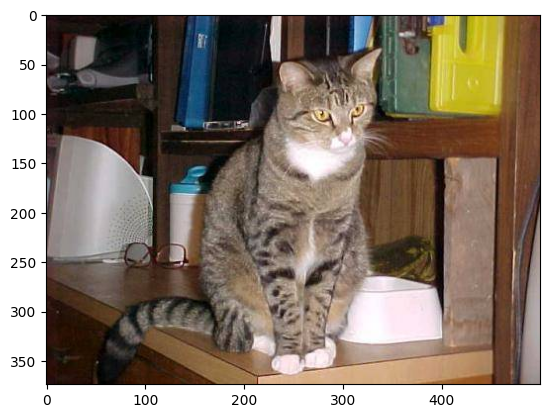

In [67]:
img=mpimg.imread('/content/train/cat.9949.jpg')
imgplot=plt.imshow(img)
plt.show()

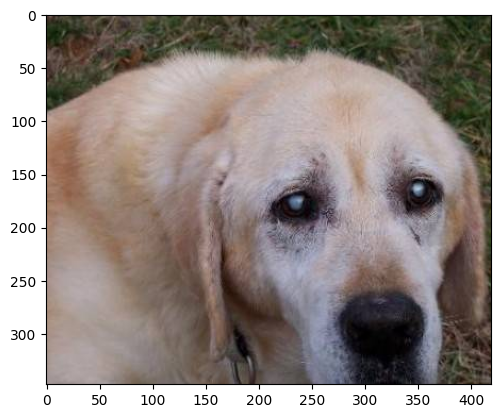

In [68]:
img=mpimg.imread('/content/train/dog.12374.jpg')
imgplot=plt.imshow(img)
plt.show()

Resizing all the images

Now seperating the dogs and cats images. we have 25000 images. we dont need 25k images for training. as we are using pretrained model. mobinet model works well with smalldataset.

In [69]:
file_names=os.listdir('/content/train')

In [70]:
 for i in range(5):
  print(file_names[i])

dog.8435.jpg
dog.4308.jpg
cat.9949.jpg
dog.12374.jpg
dog.1670.jpg


In [71]:
for i in range(5):
  name=file_names[i]
  print(name[0:3])

dog
dog
cat
dog
dog


In [72]:
Dogs_count=0
Cats_count=0
for img_files in file_names:
  name=img_files[0:3]
  if name=='dog':
    Dogs_count+=1
  else:
    Cats_count+=1


In [73]:
  print('Dogs_count : ',Dogs_count)
  print('Cats_count : ',Cats_count)

Dogs_count :  12500
Cats_count :  12500


In [79]:
## creating a directory for resized images
os.mkdir('/content/resized_image')

In [82]:
# !ls /content/train/


In [86]:
# original_folder = '/content/train/'
# resized_folder = '/content/resized_image/'

# for i in range(2000):
#   filename=os.listdir('original_folder')[i]
#   img_path=original_folder+filename

#   img=Image.open(img_path)
#   img=img.resize((224,224))
#   img=img.convert('RGB')
#   new_img_path=resized_folder+filename
#   img.save(new_img_path)


In [80]:
import os
from PIL import Image

original_folder = '/content/train/'           # folder where images are after unzip
resized_folder = '/content/resized_image/'    # output folder

os.makedirs(resized_folder, exist_ok=True)

for i, filename in enumerate(os.listdir(original_folder)[:2000]):  # limit to 2000
    img_path = os.path.join(original_folder, filename)

    try:
        img = Image.open(img_path)
        img = img.resize((224, 224))
        img = img.convert('RGB')
        new_img_path = os.path.join(resized_folder, filename)
        img.save(new_img_path)
    except:
        print(f"Skipping file: {filename}")


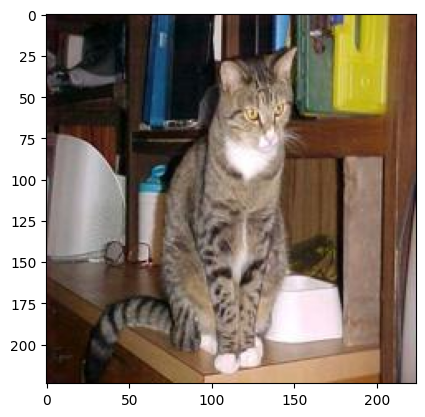

In [81]:
img=mpimg.imread('/content/resized_image/cat.9949.jpg')
imgplot=plt.imshow(img)
plt.show()   ## displaying the resized dog image

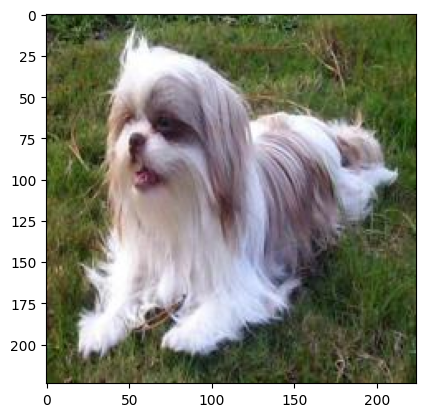

In [85]:
img=mpimg.imread('/content/resized_image/dog.8435.jpg')
imgplot=plt.imshow(img)
plt.show()

Create labels for images
Cat --> 0
Dogs --> 1

In [87]:
#### creating a for loop to assign labels

In [137]:
import os

filenamed = os.listdir('/content/resized_image/')

labels = []  # Make it a list

for i in range(len(filenamed)):  # loop over all files
    file_name = filenamed[i]
    label = file_name[0:3]  # get first 3 letters
    if label == 'cat':
        labels.append(0)  # append 0 for cat
    else:
        labels.append(1)  # append 1 for other
    print(labels[-1])  # print the label just added

# Check length and values
print("Total labels:", len(labels))
print("First 10 labels:", labels[:10])


1
1
0
1
1
0
1
1
0
1
1
1
0
1
0
0
0
0
0
0
1
1
0
1
1
1
0
0
1
0
0
1
0
1
1
0
1
0
0
1
0
0
0
0
0
0
1
1
0
1
0
1
0
0
1
0
1
1
0
0
1
0
0
1
1
1
0
1
0
0
1
0
1
0
1
0
1
1
1
1
0
0
1
0
1
1
1
0
1
0
0
1
0
0
0
0
0
1
0
0
1
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
1
1
0
0
0
1
0
1
0
0
1
0
1
0
0
1
1
1
0
1
0
1
0
1
1
0
1
1
1
1
1
0
0
0
1
1
1
1
0
0
1
1
0
0
0
1
0
1
0
0
0
0
1
1
1
0
1
1
0
1
1
0
1
0
0
0
1
0
1
0
1
0
1
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
1
1
0
0
1
1
1
1
0
0
0
1
1
1
1
0
1
0
1
0
0
1
0
1
1
1
0
0
1
1
0
1
0
0
0
0
1
1
1
0
1
1
0
1
0
0
1
1
0
1
1
1
1
0
1
1
1
1
0
0
0
0
0
1
0
1
1
0
1
1
1
1
0
0
0
1
0
0
0
0
1
1
1
0
0
0
1
0
0
0
1
0
0
1
1
0
0
1
0
1
1
1
1
0
0
1
1
1
0
0
1
0
0
1
1
1
0
1
0
1
1
0
0
0
0
1
1
1
1
0
0
0
1
0
1
0
1
1
1
1
0
0
1
0
0
0
0
1
0
0
0
1
0
0
1
0
1
1
1
0
1
0
0
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
0
1
0
1
0
0
1
1
1
1
1
0
0
1
0
0
0
0
1
1
0
1
0
0
1
1
1
0
1
1
1
0
0
0
1
0
1
1
1
0
1
0
0
1
0
1
1
1
1
0
1
0
1
0
1
1
1
0
0
0
1
1
1
1
1
1
1
0
1
0
1
1
0
0
1
0
1
0
1
1
0
0
0
1
0
1
0
0
1


In [138]:
# # filenamed=os.listdir('/content/resized_image/')


# # labels=[]
# # for i in range(2000):
# #   file_name=filenamed[i]
# #   label=file_name[0:3]
# #   if label=='cat':
# #     # label.append(0)
# #     labels=0
# #   else:
# #     # label.append(1)
# #     labels=1
# #   print(labels)

# # labels = []  # create empty list

# # for i in range(2000):
# #     filename = os.listdir('/content/resized_image/')

# #     if 'cat' in filename.lower():
# #         labels.append(0)
# #     else:
# #         labels.append(1)

# import os

# filenamed = os.listdir('/content/resized_image/')

# labels = []  # Make it a list

# for i in range(len(filenamed)):  # loop over all files
#     file_name = filenamed[i]
#     label = file_name[0:3]  # get first 3 letters
#     if label == 'cat':
#         labels.append(0)  # append 0 for cat
#     else:
#         labels.append(1)  # append 1 for other
#     print(labels[-1])  # print the label just added

# # Check length and values
# print("Total labels:", len(labels))
# print("First 10 labels:", labels[:10])



In [108]:
print(filenamed[0:5])
print(len(filenamed))

['dog.8435.jpg', 'dog.4308.jpg', 'cat.9949.jpg', 'dog.12374.jpg', 'dog.1670.jpg']
2000


In [99]:
# print(label[:5])
# print(len(label))

In [100]:
##Counting the images of dogs and cats out of 2000 images

In [131]:
# values,ncounts=np.unique(labels,return_counts=True)
# print(values)
# # print(ncounts)
# # print('counts:',len(labels))

[0]


In [139]:
print(type(labels))

<class 'list'>


In [140]:
print(labels.count(0))
print(labels.count(1))


979
1021


In [142]:
print('length of labels:' , len(labels))

length of labels: 2000


Converting all the resized images to numpy array

In [144]:
import cv2
import glob

In [145]:
image_directory= '/content/resized_image/'
image_extension=['png','jpg']

files=[]
[files.extend(glob.glob(image_directory+'*.'+e)) for e in image_extension]
dogs_cats_images=np.asarray([cv2.imread(file) for file in files])

In [146]:
print(dogs_cats_images)

[[[[ 13  39  16]
   [ 52  80  57]
   [ 70  99  74]
   ...
   [ 35  86  82]
   [ 32  81  79]
   [ 32  80  81]]

  [[ 46  72  49]
   [ 51  79  56]
   [ 43  72  49]
   ...
   [ 39  91  84]
   [ 32  81  79]
   [ 30  78  79]]

  [[ 79 104  84]
   [ 45  73  50]
   [ 24  53  30]
   ...
   [ 29  81  74]
   [ 21  70  68]
   [ 24  73  71]]

  ...

  [[ 26  71  54]
   [ 25  73  55]
   [ 24  72  54]
   ...
   [ 21  53  42]
   [  7  37  24]
   [ 21  51  38]]

  [[ 23  72  52]
   [ 26  75  55]
   [ 26  75  55]
   ...
   [ 15  47  36]
   [  8  38  25]
   [ 19  50  35]]

  [[ 22  71  49]
   [ 26  75  53]
   [ 26  77  57]
   ...
   [ 14  47  33]
   [ 13  43  30]
   [ 22  53  38]]]


 [[[ 20  55  95]
   [ 23  57 100]
   [ 26  59 105]
   ...
   [118 117 119]
   [130 132 133]
   [192 194 195]]

  [[ 19  54  94]
   [ 22  56  99]
   [ 25  58 104]
   ...
   [146 145 147]
   [188 190 191]
   [196 198 199]]

  [[ 20  55  95]
   [ 23  57 100]
   [ 25  58 104]
   ...
   [130 129 131]
   [205 207 208]
   [214 216

In [147]:
print(type(dogs_cats_images))

<class 'numpy.ndarray'>


In [148]:
print(dogs_cats_images.shape)

(2000, 224, 224, 3)


In [165]:
X= dogs_cats_images
Y=np.asarray(labels)

Train_test_split

In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print(X_train.shape, X.shape)
print(X_test.shape, Y_test.shape)
                                                ##if u want to split the data shpuld happen in same way, random state is used

(1600, 224, 224, 3) (2000, 224, 224, 3)
(400, 224, 224, 3) (400,)


In [162]:
# print(X_train.shape,X.shape)
# print(X_test.shape)

(1600, 224, 224, 3) (2000, 224, 224, 3)
(1600,)


1600 ---> training images
400 --> test images

In [163]:
## scaling data

In [167]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [168]:
print(X_train_scaled)

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [0.99607843 0.99607843 0.99607843]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [0.99607843 0.99607843 0.99607843]]

  ...

  [[0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.96470588 0.99215686 0.98039216]
   [0.97254902 1.         0.98823529]
   [0.98039216 1.         0.99607843]]

  [[0.99607843 0.99607843 0.99607843]
   [0.9

Building the neural network

In [171]:
import tensorflow as tf
import tensorflow_hub as hub

In [172]:
# mobilenet_model='https://www.kaggle.com/models/google/mobilenet-v2/tensorFlow2/tf2-preview-feature-vector/4?tfhub-redirect=true'
# pretrained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [173]:
# num_of_classes=2
# model=tf.keras.Sequential([
#     pretrained_model,
#     tf.keras.layers.Dense(num_of_classes)
# ])
# model.summary()

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7fb509890350> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [174]:
# import tensorflow as tf
# import tensorflow_hub as hub

# # Use the original TF Hub URL (it will internally redirect to Kaggle)
# mobilenet_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

# # Load pre-trained MobileNetV2 feature extractor
# feature_extractor = hub.KerasLayer(
#     mobilenet_url,
#     input_shape=(224, 224, 3),
#     trainable=False
# )

# # Build the classification model
# model = tf.keras.Sequential([
#     feature_extractor,
#     tf.keras.layers.Dense(2, activation='softmax')  # 2 classes: cat/dog etc.
# ])

# # Compile model
# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# model.summary()


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7fb50226f590> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [175]:
# !pip install -q tensorflow==2.15.0 tensorflow-hub==0.15.0


ERROR: Could not find a version that satisfies the requirement tensorflow==2.15.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.15.0


In [176]:
# !pip install -q tensorflow==2.17.1 tensorflow-hub==0.16.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.4/601.4 MB 809.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.7.2 requires ml_dtypes>=0.5.0, but you have ml-dtypes 0.4.1 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have num

In [177]:
!pip install -q tensorflow==2.19.0 tensorflow-hub==0.16.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 594.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.


In [192]:
# import tensorflow as tf
# import tensorflow_hub as hub

# print("TF version:", tf.__version__)
# print("Hub version:", hub.__version__)

# mobilenet_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"


# # ✅ Functional API avoids Sequential issues
# inputs = tf.keras.Input(shape=(224, 224, 3))
# x = hub.KerasLayer(mobilenet_url, trainable=False)(inputs)
# outputs = tf.keras.layers.Dense(2, activation='softmax')(x)
# model = tf.keras.Model(inputs, outputs)

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.summary()


In [180]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF:", tf.__version__)
print("Hub:", hub.__version__)

# ✅ Use a stable TF Hub Mobilenet feature extractor URL
mobilenet_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"

# ✅ Define input
inputs = tf.keras.Input(shape=(224, 224, 3), dtype=tf.float32)

# ✅ Wrap the Hub layer in a lambda to avoid eager/Numpy conversion
x = tf.keras.layers.Lambda(lambda img: hub.KerasLayer(mobilenet_url, trainable=False)(img))(inputs)

# ✅ Add classifier head
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)

# ✅ Build final model
model = tf.keras.Model(inputs, outputs)

# ✅ Compile
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


TF: 2.19.0
Hub: 0.16.1


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,562 (10.01 KB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 0 (0.00 B)

In [181]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8059 - loss: 0.4355
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9825 - loss: 0.0611
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9876 - loss: 0.0458
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9928 - loss: 0.0352
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9929 - loss: 0.0302


In [184]:
score,acc=model.evaluate(X_test_scaled,Y_test)


13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9901 - loss: 0.0538


In [185]:
print('Test Loss:',score)
print('Test Accuracy:',acc)

Test Loss: 0.04349576309323311
Test Accuracy: 0.9925000071525574


Building the predictive system

Path of image to be predicted/content/cat.jpg


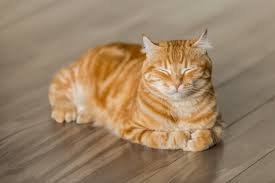

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The image is of cat


In [188]:
input_image_path=input('Path of image to be predicted')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(224,224))
input_image_scaled= input_image_resize/255
image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)
if input_pred_label==0:
  print('The image is of cat')
else:
  print('The image is of dog')

we get output [0.86,0.14] so here the probability of 0 is 0.86 and 1 is 0.14 here dogs and cats is 0 and 1

Path of image to be predicted/content/dog.jpg


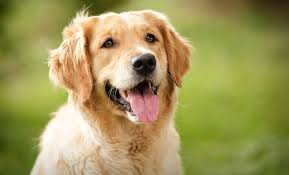

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[[1.4461852e-04 9.9985540e-01]]
1
The image is of dog


In [191]:
input_image_path=input('Path of image to be predicted')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(224,224))
input_image_scaled= input_image_resize/255
image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])
input_prediction=model.predict(image_reshaped)
print(input_prediction)
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label==0:
  print('The image is of cat')
else:
  print('The image is of dog')